# Multiple Linear Regression 

In [1]:
# import necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# import data
# https://www.kaggle.com/datasets/abhishek14398/50startups
data = pd.read_csv('../Data/50_Startups_dataset.csv')
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [6]:
# drop the first column
data.drop(data.columns[0], axis=1, inplace=True)

In [7]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [23]:
# split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Profit', axis=1),
                                                    data['Profit'],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# data preprocessing 
preprocessor = ColumnTransformer(transformers=[
    ('num_scaler', StandardScaler(), numeric_cols ),
    ('encoder', OneHotEncoder(), ['State'])
], remainder='passthrough')

# creating the regressor 
regressor = LinearRegression()

# create the pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit the pipeline 
pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['State'])])),
                ('regressor', LinearRegression())])

In [29]:
# get the parameters of the model 
intercept = pipeline.named_steps['regressor'].intercept_
coef = pipeline.named_steps['regressor'].coef_

print(f'The intercept of the model is : {intercept} and the coeffecient is : {coef}')

The intercept of the model is : 115636.23218123059 and the coeffecient is : [38102.26926978 -1864.75430033  3386.17580673  -315.26025537
   623.53275078  -308.2724954 ]


In [30]:
# predict 
y_predict = pipeline.predict(X_test)
y_predict

array([126362.97908252,  84608.55383643,  99677.59425155,  46357.56068582,
       128750.58288497,  50912.51741905, 109741.450327  , 100643.34281644,
        97599.375746  , 113097.52524437])

R² Score: 0.899
MSE: 82010363.045
RMSE: 9055.957
MAE: 6961.478


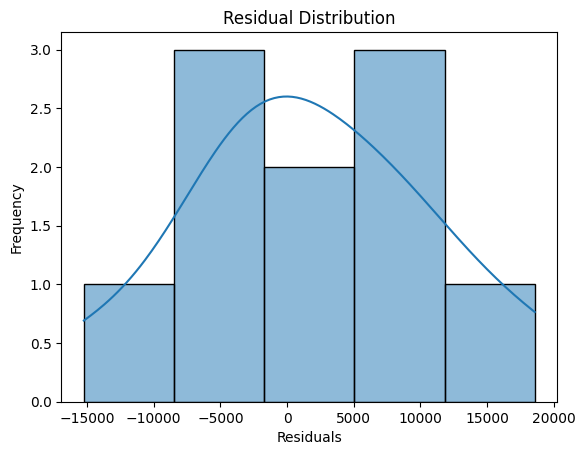

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()